### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the data file

In [2]:
filename = "VH_Planar_RT_Rinf_+1mA_45°_3s"
data_dir = f"../Data/{filename}.dat"

df = pd.read_csv(data_dir, delimiter='\t', encoding='ISO-8859-1')

In [3]:
df.columns = df.columns.str.strip()

for col in df.columns:
    df[col] = df[col].str.replace(',', '.')
    df[col] = df[col].astype(float)

### Basic data analysis

In [4]:
df.columns

Index(['Hmes(G)', 'Hcons(G)', 'V1xx (V)', 'I1xx(A)', 'R1xx(Ohm)', 'V2xy (V)',
       'I2xx (A)', 'R2xy (Ohm)', 'Virt', 'Iload ((A)', 'Rvirt (Ohm)',
       'Vload (V)', 'Ivirt', 'Rvirt (Ohm).1'],
      dtype='object')

In [14]:
df.head()

,Hmes(G),Hcons(G),V1xx (V),I1xx(A),R1xx(Ohm),V2xy (V),I2xx (A),R2xy (Ohm),Virt,Iload ((A),Rvirt (Ohm),Vload (V),Ivirt,Rvirt (Ohm).1
0,4837.0,4742.0,0.024809,0.001,24.80780,-0.000117,0.001,-0.116915,1.0,-2.619345e-10,-3.817748e+09,-0.000130,1.0,-0.000130
1,6282.0,6742.0,0.024799,0.001,24.79850,-0.000117,0.001,-0.117122,1.0,3.783498e-10,2.643057e+09,-0.000128,1.0,-0.000128
2,8514.0,8742.0,0.024794,0.001,24.79251,-0.000117,0.001,-0.117304,1.0,-2.619345e-10,-3.817748e+09,-0.000130,1.0,-0.000130
3,10063.0,10000.0,0.024789,0.001,24.78776,-0.000117,0.001,-0.117364,1.0,5.529728e-10,1.808407e+09,-0.000131,1.0,-0.000131
4,9236.0,9000.0,0.024793,0.001,24.79153,-0.000117,0.001,-0.117294,1.0,4.656613e-10,2.147484e+09,-0.000130,1.0,-0.000130


In [5]:
print(df.isnull().sum())

Hmes(G)          0
Hcons(G)         0
V1xx (V)         0
I1xx(A)          0
R1xx(Ohm)        0
V2xy (V)         0
I2xx (A)         0
R2xy (Ohm)       0
Virt             0
Iload ((A)       0
Rvirt (Ohm)      0
Vload (V)        0
Ivirt            0
Rvirt (Ohm).1    0
dtype: int64


In [6]:
df.describe()

/home/alper/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Hmes(G),Hcons(G),V1xx (V),I1xx(A),R1xx(Ohm),V2xy (V),I2xx (A),R2xy (Ohm),Virt,Iload ((A),Rvirt (Ohm),Vload (V),Ivirt,Rvirt (Ohm).1
count,76.000000,76.000000,76.000000,7.600000e+01,76.000000,7.600000e+01,7.600000e+01,76.000000,76.0,7.600000e+01,7.600000e+01,76.000000,76.0,76.000000
mean,389.460526,397.710526,0.024815,1.000040e-03,24.813949,-1.165182e-04,1.000040e-03,-0.116514,1.0,9.114094e-11,inf,-0.000130,1.0,-0.000130
std,4756.826030,4689.367397,0.000015,3.180726e-09,0.014732,5.734760e-07,2.495294e-09,0.000573,0.0,1.931315e-10,NaN,0.000002,0.0,0.000002
min,-10164.000000,-10000.000000,0.024787,1.000034e-03,24.786030,-1.174240e-04,1.000035e-03,-0.117419,1.0,-3.201421e-10,-3.435974e+10,-0.000134,1.0,-0.000134
25%,-654.250000,-550.000000,0.024802,1.000039e-03,24.801443,-1.169866e-04,1.000038e-03,-0.116982,1.0,-2.910383e-11,-4.090444e+09,-0.000132,1.0,-0.000132
50%,43.500000,50.000000,0.024819,1.000041e-03,24.818395,-1.165212e-04,1.000040e-03,-0.116517,1.0,5.820766e-11,4.294968e+09,-0.000131,1.0,-0.000131
75%,2515.500000,2550.000000,0.024826,1.000042e-03,24.825087,-1.161687e-04,1.000041e-03,-0.116164,1.0,1.818989e-10,1.145325e+10,-0.000129,1.0,-0.000129
max,10151.000000,10000.000000,0.024841,1.000047e-03,24.839900,-1.145473e-04,1.000047e-03,-0.114542,1.0,5.529728e-10,inf,-0.000127,1.0,-0.000127


### Initial Plots

Now we can plot some initial properties and try to retrieve the hysteresis loop.

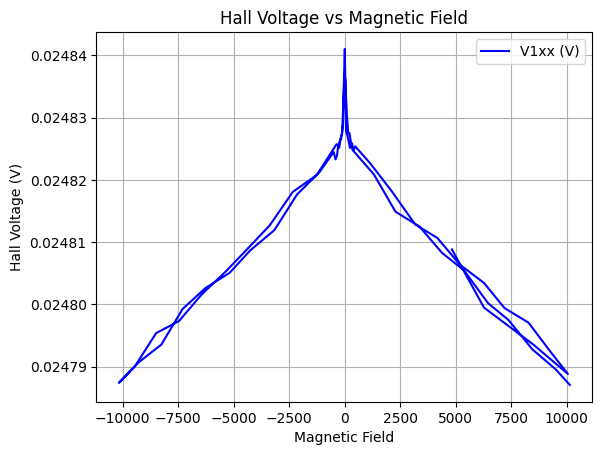

In [7]:
# Plot 1: Hall Voltage (V1xx) vs Magnetic Field (Hmes(G))
plt.figure()
plt.plot(df['Hmes(G)'], df['V1xx (V)'], label='V1xx (V)', color='blue')
plt.xlabel('Magnetic Field')
plt.ylabel('Hall Voltage (V)')
plt.title('Hall Voltage vs Magnetic Field')
plt.legend()
plt.grid(True)
plt.show()

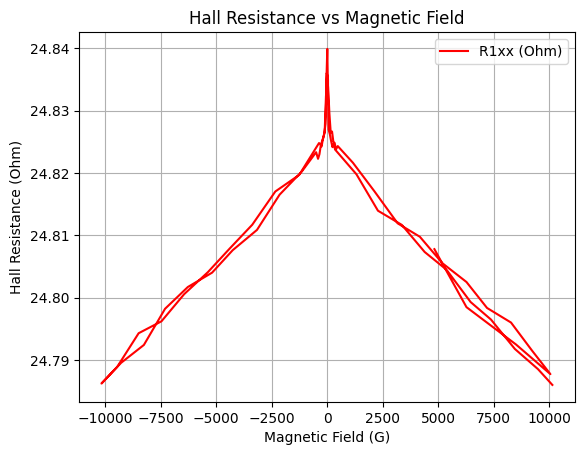

In [8]:
# Plot 2: Hall Resistance (R1xx) vs Magnetic Field (Hmes (G))
plt.figure()
plt.plot(df['Hmes(G)'], df['R1xx(Ohm)'], label='R1xx (Ohm)', color='red')
plt.xlabel('Magnetic Field (G)')
plt.ylabel('Hall Resistance (Ohm)')
plt.title('Hall Resistance vs Magnetic Field')
plt.legend()
plt.grid(True)
plt.show()

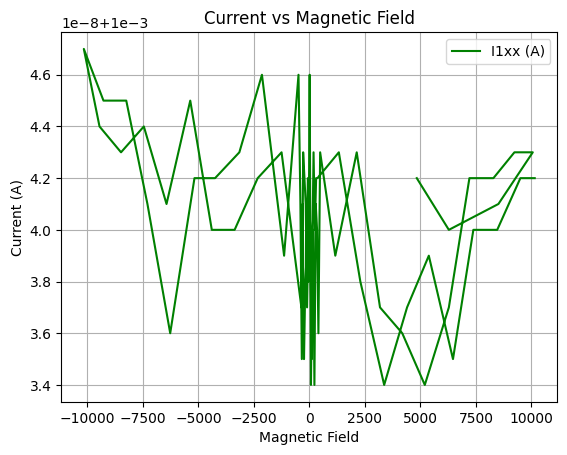

In [9]:
# Plot 3: Current (I1xx) vs Magnetic Field (Ang. Meas. (°))
plt.figure()
plt.plot(df['Hmes(G)'], df['I1xx(A)'], label='I1xx (A)', color='green')
plt.xlabel('Magnetic Field')
plt.ylabel('Current (A)')
plt.title('Current vs Magnetic Field')
plt.legend()
plt.grid(True)
plt.show()

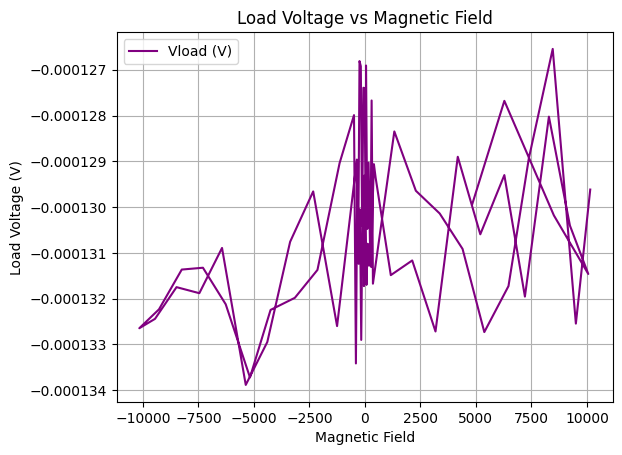

In [10]:
# Plot 4: Load Voltage (Vload) vs Magnetic Field
plt.figure()
plt.plot(df['Hmes(G)'], df['Vload (V)'], label='Vload (V)', color='purple')
plt.xlabel('Magnetic Field')
plt.ylabel('Load Voltage (V)')
plt.title('Load Voltage vs Magnetic Field')
plt.legend()
plt.grid(True)
plt.show()

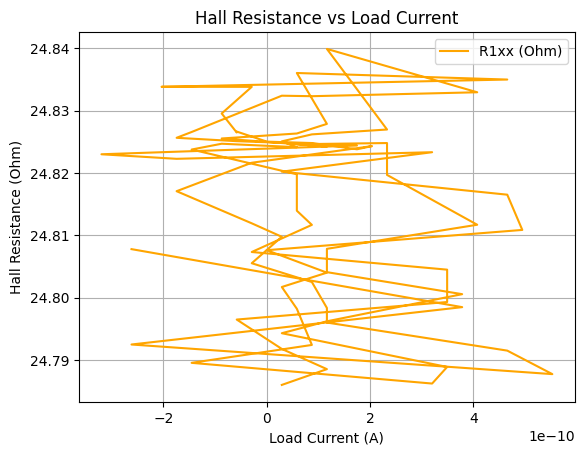

In [11]:
# Plot 5: Hall Resistance (R1xx) vs Load Current (Iload)
plt.figure()
plt.plot(df['Iload ((A)'], df['R1xx(Ohm)'], label='R1xx (Ohm)', color='orange')
plt.xlabel('Load Current (A)')
plt.ylabel('Hall Resistance (Ohm)')
plt.title('Hall Resistance vs Load Current')
plt.legend()
plt.grid(True)
plt.show()

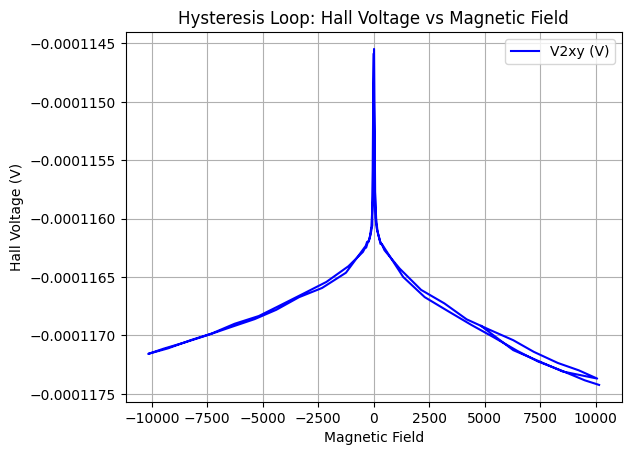

In [12]:
# Plot Hysteresis Loop: Hall Voltage (V2xy) vs Magnetic Field)
plt.figure()
plt.plot(df['Hmes(G)'], df['V2xy (V)'], label='V2xy (V)', color='blue')
plt.xlabel('Magnetic Field')
plt.ylabel('Hall Voltage (V)')
plt.title('Hysteresis Loop: Hall Voltage vs Magnetic Field')
plt.grid(True)
plt.legend()
plt.show()

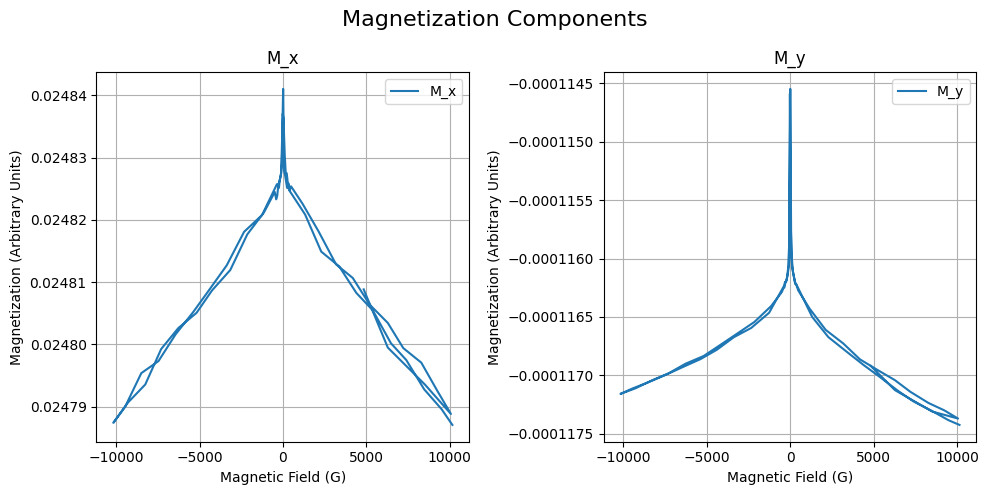

In [15]:
# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns

# First subplot: M_x component (could be V1xx or another component)
axes[0].plot(df['Hmes(G)'], df['V1xx (V)'], label='M_x')
axes[0].set_xlabel('Magnetic Field (G)')
axes[0].set_ylabel('Magnetization (Arbitrary Units)')
axes[0].set_title('M_x')
axes[0].legend()
axes[0].grid(True)

# Second subplot: M_y component (could be another relevant data like V2xy)
axes[1].plot(df['Hmes(G)'], df['V2xy (V)'], label='M_y')
axes[1].set_xlabel('Magnetic Field (G)')
axes[1].set_ylabel('Magnetization (Arbitrary Units)')
axes[1].set_title('M_y')
axes[1].legend()
axes[1].grid(True)

# Set a common title for the whole figure
fig.suptitle('Magnetization Components', fontsize=16)

# Adjust layout to make sure labels/titles don't overlap
plt.tight_layout()

# Show the plot
plt.show()